In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

Visualization of cough audiio
characteristics for medical interpretation

In [ ]:
audio, sr=librosa.load("/content/sample_data/ZOOM0044_5s.wav")

In [ ]:
audio.shape

(112031,)

In [ ]:
sr

22050

In [ ]:
duration = len(audio) / sr

In [ ]:
duration

5.080770975056689

In [ ]:
threshold=0.3
energy = np.abs(librosa.amplitude_to_db(audio))
significant_points = np.where(energy > threshold)[0]
if len(significant_points) > 0:
    first_start_point = significant_points[0]
else:
    print("No significant points found.")
significant_points = np.where(energy > threshold)[0]

In [ ]:
first_start_point

0

In [ ]:
energy

array([84.73987 , 84.2884  , 84.2884  , ..., 54.745975, 63.265347,
       48.164803], dtype=float32)

In [ ]:
np.max(energy)

84.73987

In [ ]:
np.min(energy)

4.7398715

In [ ]:
energy.shape

(112031,)

In [ ]:
significant_points

array([     0,      1,      2, ..., 112028, 112029, 112030])

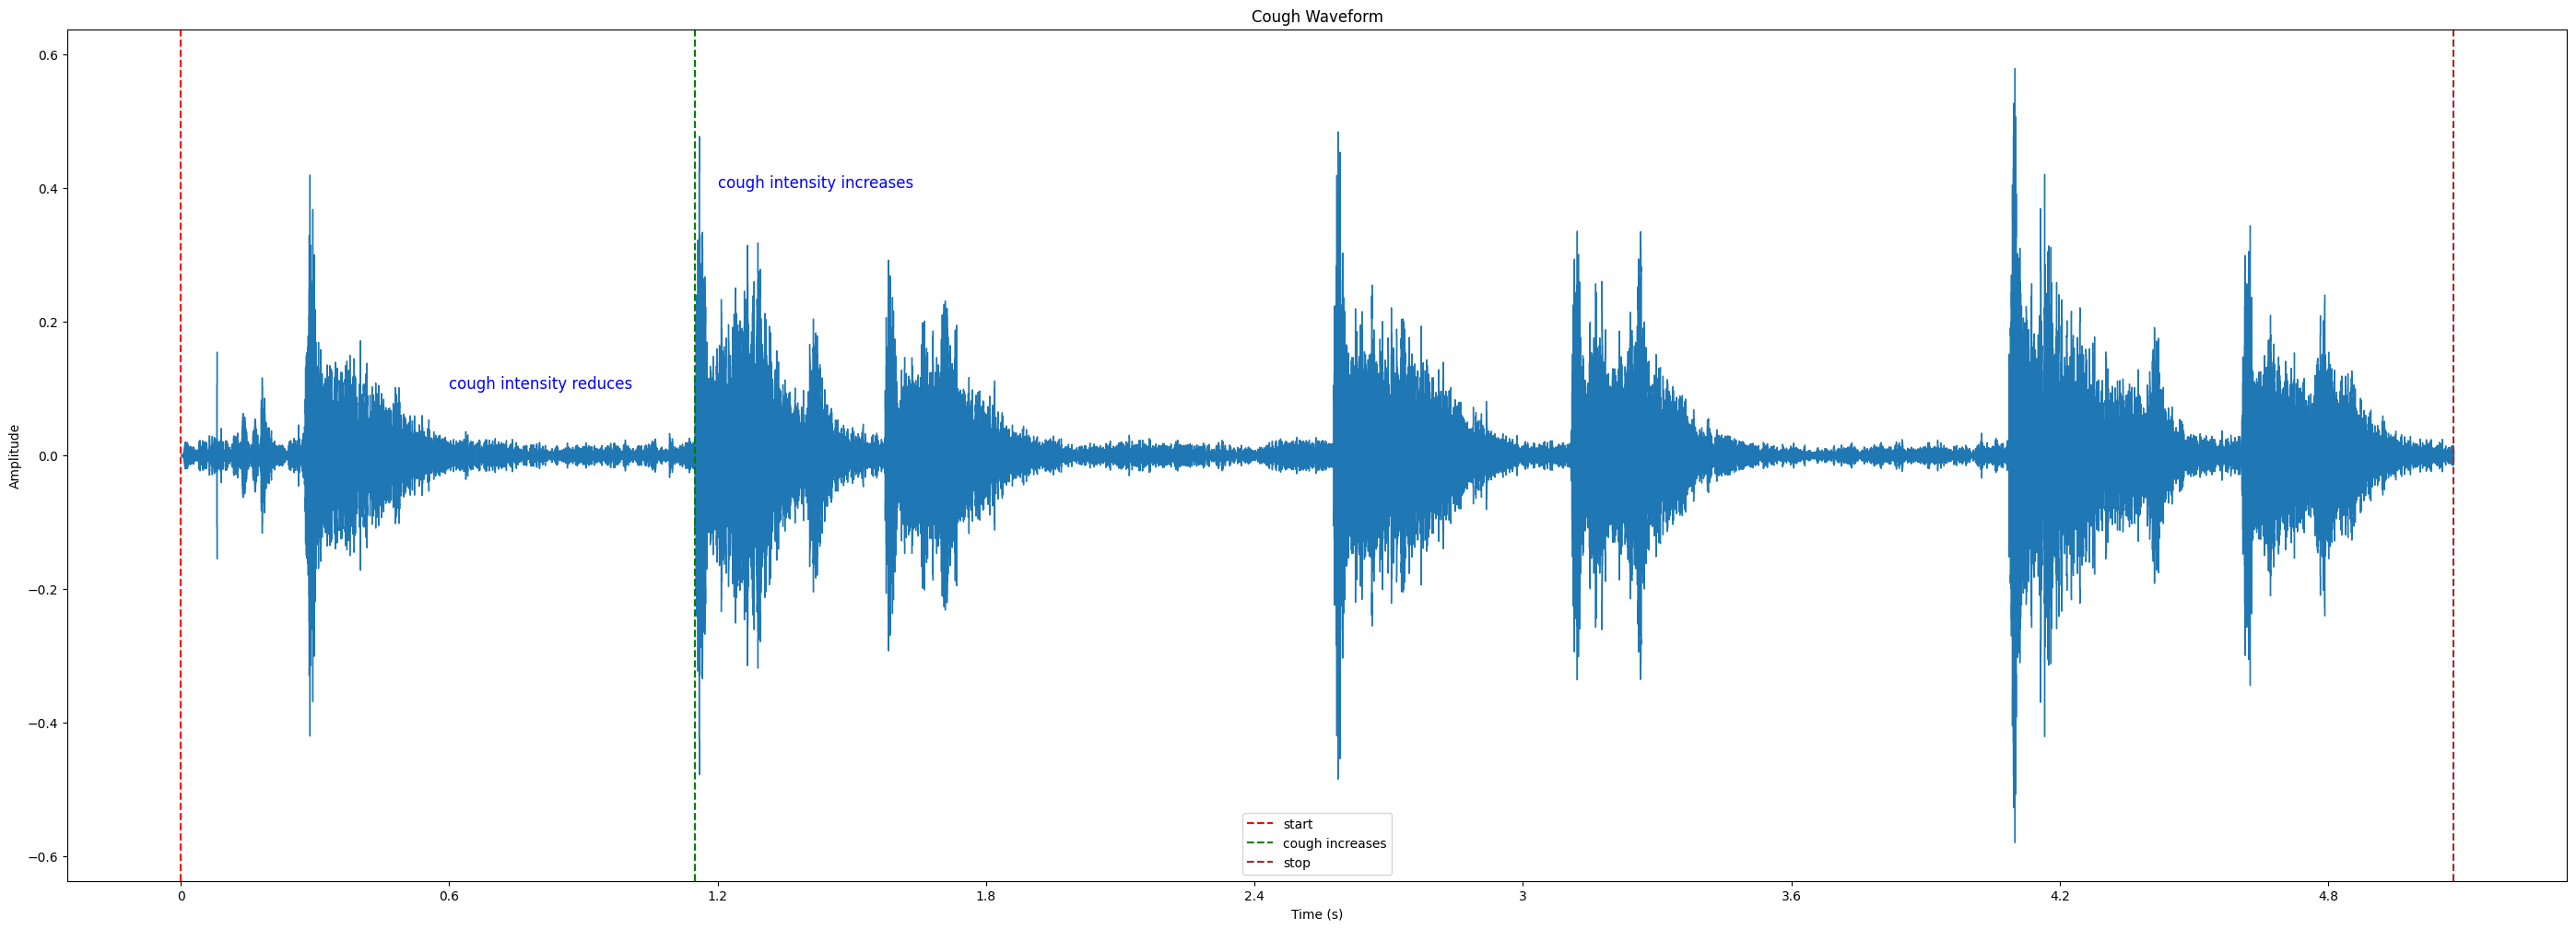

In [ ]:
plt.figure(figsize=(35,12))
librosa.display.waveshow(audio,sr=sr)
plt.title("Cough Waveform")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axvline(x=0, color='r', linestyle='--', label='start')
plt.axvline(x=1.15, color='g', linestyle='--', label='cough increases')
plt.text(0.6, 0.1, 'cough intensity reduces', fontsize=12, color='b')
plt.text(1.2, 0.4, 'cough intensity increases', fontsize=12, color='b')
plt.axvline(x=5.08, color='brown', linestyle='--', label='stop')
plt.legend()
plt.show()

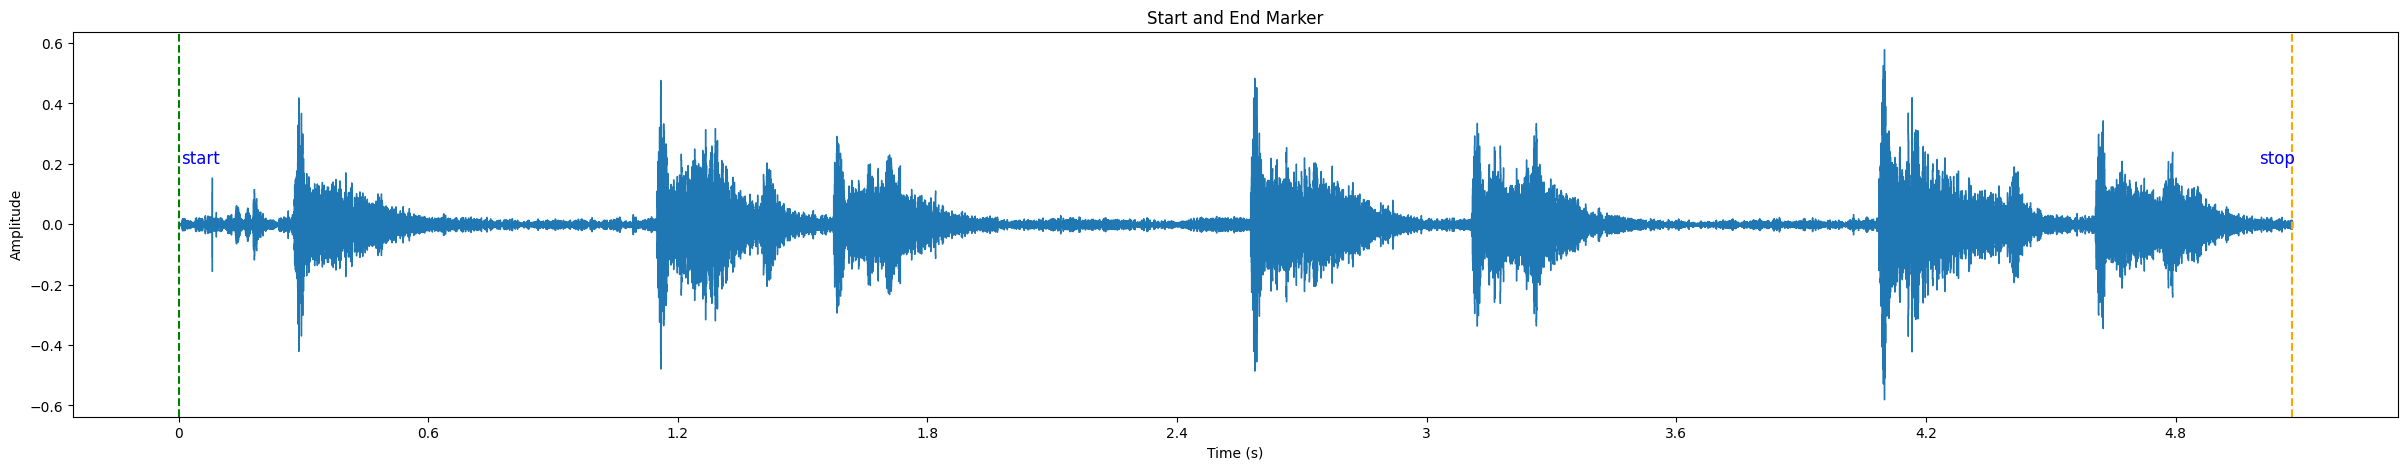

In [ ]:
duration=len(audio)/sr
plt.figure(figsize=(30,5))
librosa.display.waveshow(audio,sr=sr)
s=0
e=duration
plt.text(0.005, 0.2, 'start', fontsize=12, color='b')
plt.text(5, 0.2, 'stop', fontsize=12, color='b')
plt.axvline(s,color='green',linestyle='--',label="start")
plt.axvline(e,color="orange",linestyle="--",label="end")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Start and End Marker')
plt.show()

In [ ]:
onset_frames=librosa.onset.onset_detect(y=audio, sr=sr, units='time')

In [ ]:
onset_frames

array([0.06965986, 0.11609977, 0.20897959, 0.30185941, 1.18421769,
       1.43963719, 1.60217687, 2.48453515, 2.60063492, 3.13469388,
       4.10993197, 4.43501134, 4.64399093])

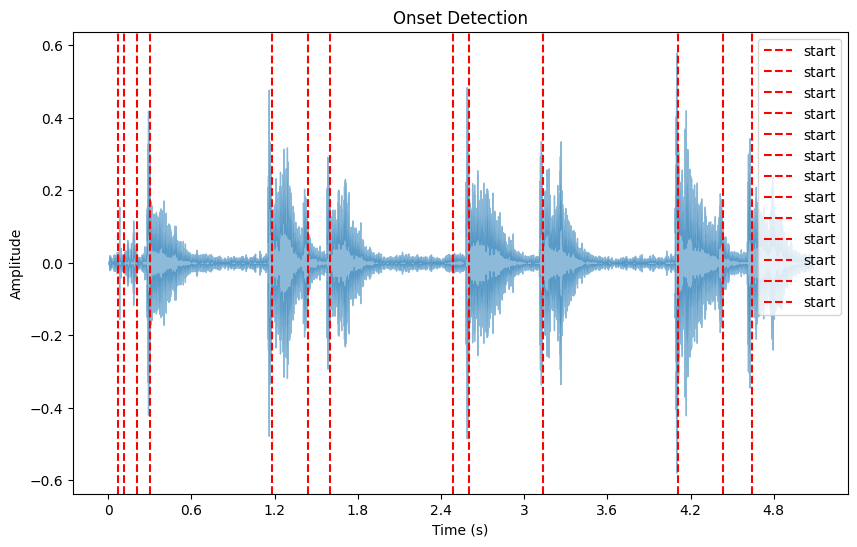

In [ ]:
onset_env = librosa.onset.onset_strength(y=audio, sr=sr)
time = librosa.frames_to_time(range(len(onset_env)), sr=sr)
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio, sr=sr, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Onset Detection')
for i in onset_frames:
    plt.axvline(i, color='r', linestyle='--',label='start')

plt.legend()
plt.show()

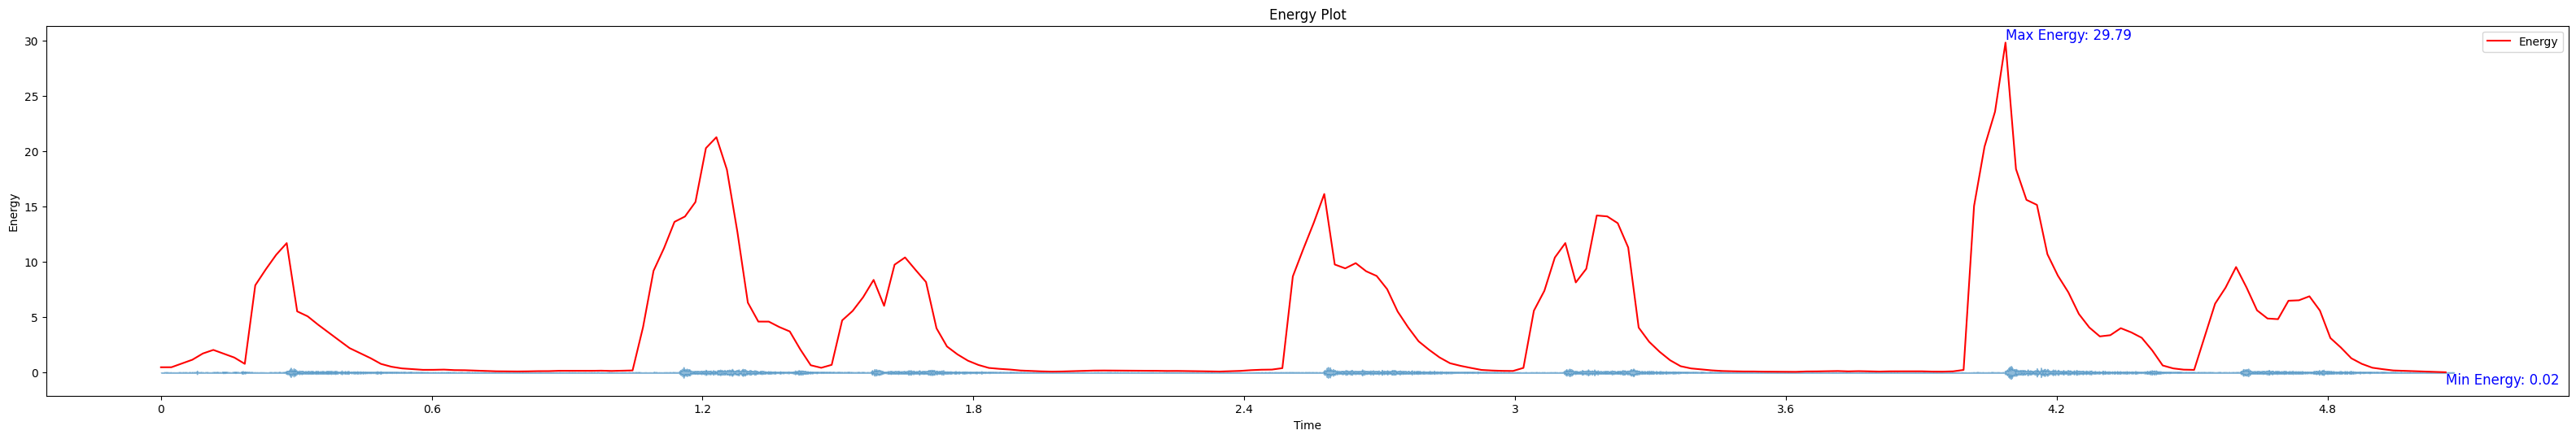

In [ ]:
window_length = 2048
hop_length = 512
energy = np.array([sum(abs(audio[i:i+window_length]**2)) for i in range(0, len(audio), hop_length)])
zcr = librosa.feature.zero_crossing_rate(audio, hop_length=hop_length)
time_energy = librosa.times_like(energy, sr=sr, hop_length=hop_length)
time_zcr = librosa.times_like(zcr, sr=sr, hop_length=hop_length)
plt.figure(figsize=(40, 13))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.5)
plt.plot(time_energy, energy, color='r', label='Energy')
plt.ylabel('Energy')
plt.title('Energy Plot')
max_energy_index = np.argmax(energy)
max_energy_time = time_energy[max_energy_index]
max_energy_value = energy[max_energy_index]
plt.text(max_energy_time, max_energy_value, f'Max Energy: {max_energy_value:.2f}', fontsize=12, color='blue', ha='left', va='bottom')
min_energy_index = np.argmin(energy)
min_energy_time = time_energy[min_energy_index]
min_energy_value = energy[min_energy_index]
plt.text(min_energy_time, min_energy_value, f'Min Energy: {min_energy_value:.2f}', fontsize=12, color='blue', ha='left', va='top')
plt.legend()
plt.show()

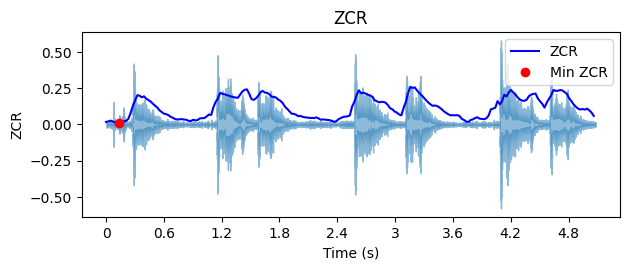

In [ ]:
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio, sr=sr, alpha=0.5)
plt.plot(time_zcr, zcr[0], color='b', label='ZCR')
plt.title("ZCR")
plt.xlabel('Time (s)')
plt.ylabel('ZCR')
min_zcr_index = np.argmin(zcr)
min_zcr_time = time_zcr[min_zcr_index]
min_zcr_value = zcr[0][min_zcr_index]
plt.plot(min_zcr_time, min_zcr_value, 'ro', markersize=6, label='Min ZCR')
plt.legend()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Amplitude')

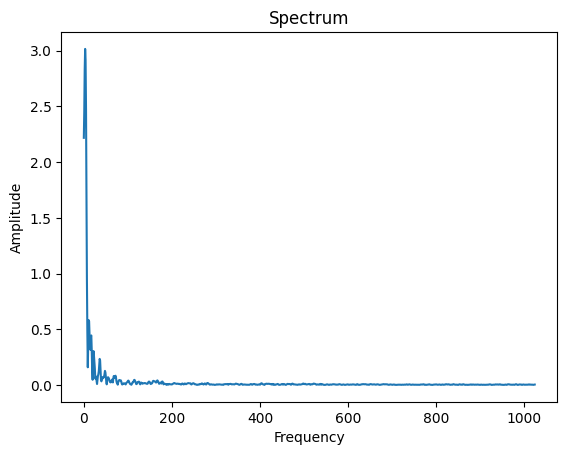

In [ ]:
n_fft = 2048
ft = np.abs(librosa.stft(audio[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

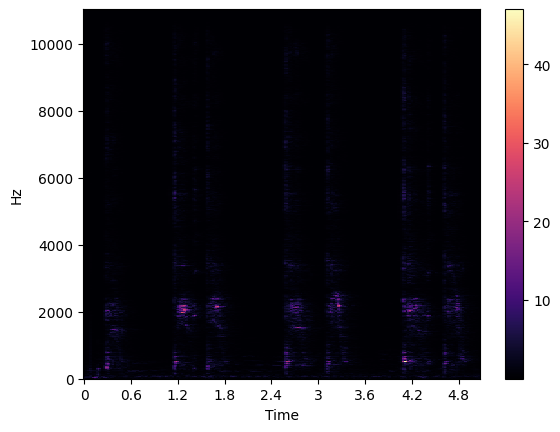

In [ ]:
hop_length = 512
D = np.abs(librosa.stft(audio, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

<ipython-input-29-bdc54baf23e1>:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


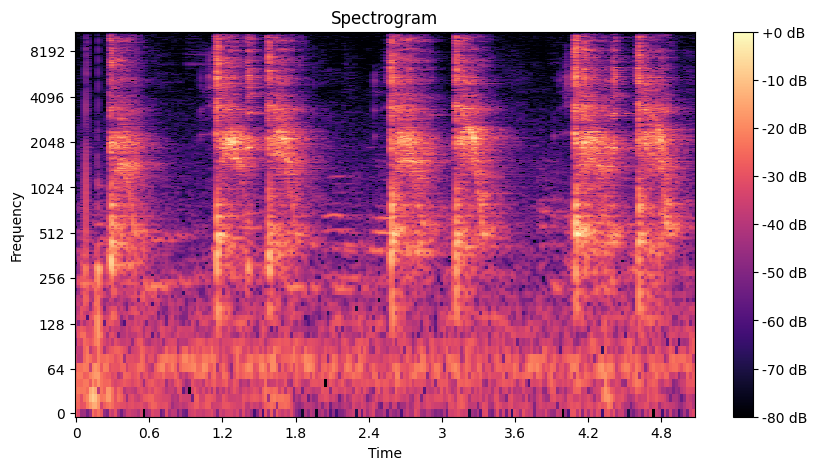

In [ ]:
# Creating a spectrogram
spectrogram = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)
#the difference is freq scale, prev was evenly spaced and this is logarithmic(better resolution for lower freq)
# Plotting the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

** Identify different mel-spectrogram generation techniques/libraries and compare the performance of each of them.**





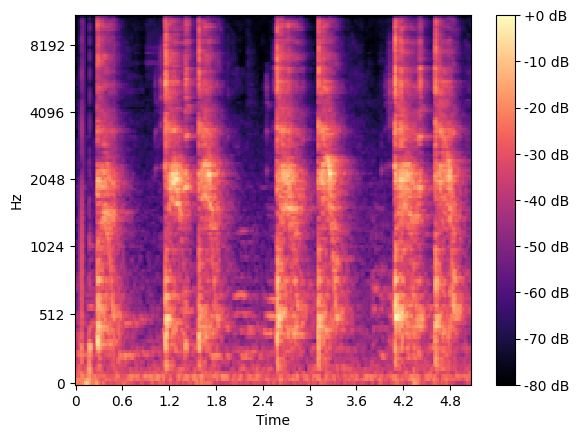

In [ ]:
# Computing mel-spectrogram using Librosa
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

# Displaying mel-spectrogram
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

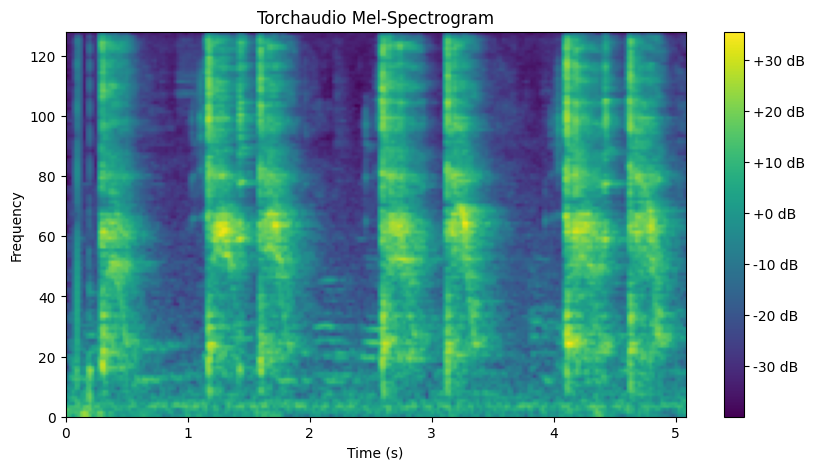

In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Assuming sr is your actual sampling rate and audio is your loaded audio data
waveform = torch.tensor(audio).view(1, -1)

# Adjusting parameters for MelSpectrogram
mel_transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr,
    n_fft=2048,
    hop_length=512,
)(waveform)

mel_torch = torchaudio.transforms.AmplitudeToDB()(mel_transform)

# Get the duration of the audio in seconds
audio_duration = waveform.shape[1] / sr

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(mel_torch[0].numpy(), cmap='viridis', origin='lower', aspect='auto',
           extent=[0, audio_duration, 0, mel_torch.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Torchaudio Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.show()


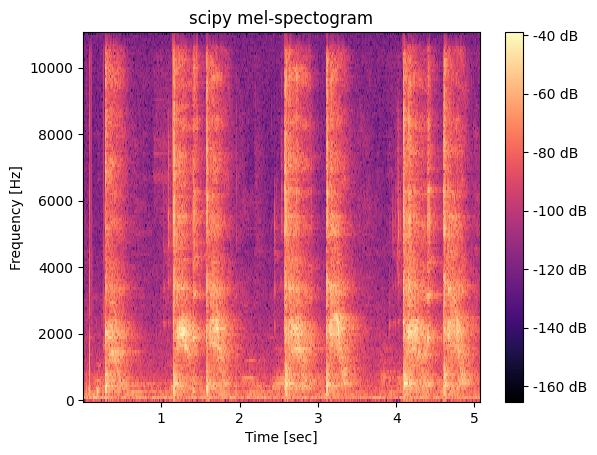

In [ ]:
from scipy.signal import spectrogram

# Computing mel-spectrogram using Scipy
frequencies, times, Sxx = spectrogram(audio, fs=sr)

# Displaying mel-spectrogram
plt.title('scipy mel-spectogram')
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap='magma',shading='auto')
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

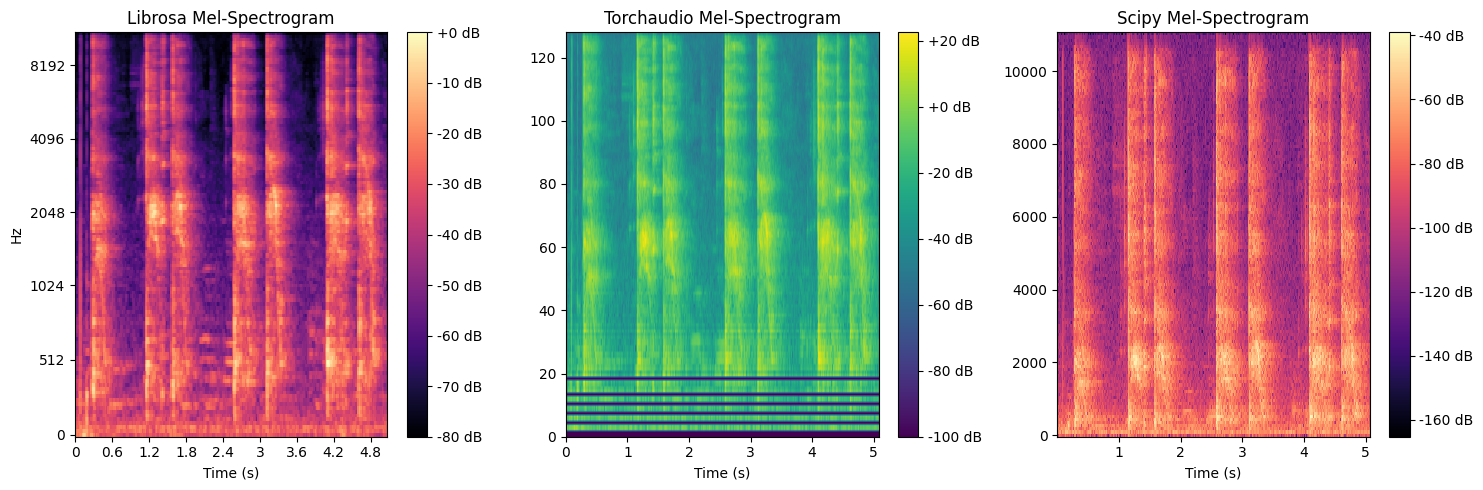

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import torchaudio
from scipy.signal import spectrogram


# Computing mel-spectrogram using Librosa
mel_spectrogram_librosa = librosa.feature.melspectrogram(y=audio, sr=sr)
librosa_mel_spec = librosa.power_to_db(mel_spectrogram_librosa, ref=np.max)

# Computing mel-spectrogram using Torchaudio
waveform = torch.tensor(audio).view(1, -1)
mel_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sr)(waveform)
mel_torch = torchaudio.transforms.AmplitudeToDB()(mel_transform)

# Computing mel-spectrogram using Scipy
frequencies, times, Sxx = spectrogram(audio, fs=sr)

# Plotting the three mel-spectrograms for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
librosa.display.specshow(librosa_mel_spec, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Librosa Mel-Spectrogram')
plt.xlabel('Time (s)')

plt.subplot(1, 3, 2)
plt.imshow(mel_torch[0].numpy(), cmap='viridis', origin='lower', aspect='auto',
           extent=[0, waveform.shape[1] / sr, 0, mel_torch.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Torchaudio Mel-Spectrogram')
plt.xlabel('Time (s)')

plt.subplot(1, 3, 3)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap='magma', shading='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('Scipy Mel-Spectrogram')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()


Librosa execution time: 0.05 seconds
Torchaudio execution time: 0.02 seconds
Scipy execution time: 0.02 seconds


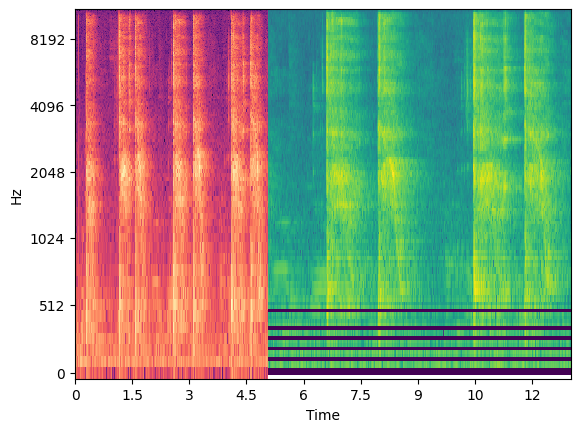

In [ ]:
import timeit

# Measuring the execution time for each case
time_librosa = timeit.timeit(stmt=code_librosa, setup="from __main__ import librosa, np, audio, sr", number=1)
time_torchaudio = timeit.timeit(stmt=code_torchaudio, setup="from __main__ import librosa, plt, mel_torch", number=1)
time_scipy = timeit.timeit(stmt=code_scipy, setup="from __main__ import plt, np, times, frequencies, Sxx", number=1)

# Printing the results
print(f"Librosa execution time: {time_librosa:.2f} seconds")
print(f"Torchaudio execution time: {time_torchaudio:.2f} seconds")
print(f"Scipy execution time: {time_scipy:.2f} seconds")